In [3]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
import csv
%matplotlib inline
#cols = ['id','zipcode','property_type','room_type','room_type_1','room_type_2','room_type_3','beds','bed_type','price','minimum_nights','availability_30','number_of_reviews','review_scores_rating']
col=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
data = pd.read_csv('output.csv',usecols=col)

print(data.head())

        id  zipcode property_type        room_type  accommodates  bathrooms  \
0  1874928  60625.0     Apartment  Entire home/apt             4        1.0   
1   739495  60625.0     Apartment  Entire home/apt             4        1.0   
2  1696051  60625.0         House  Entire home/apt             3        1.0   
3  5152597  60625.0     Apartment  Entire home/apt             5        1.0   
4  8036094  60625.0     Apartment     Private room             2        1.0   

   bedrooms  beds  bed_type  price  minimum_nights  availability_30  \
0       2.0   2.0  Real Bed  142.0             2.0              6.0   
1       2.0   2.0  Real Bed  120.0             3.0              6.0   
2       1.0   1.0  Real Bed   85.0             3.0             13.0   
3       2.0   2.0  Real Bed  125.0             2.0              0.0   
4       1.0   1.0  Real Bed   75.0             1.0             23.0   

   number_of_reviews  review_scores_rating  
0               34.0                  99.0  
1       

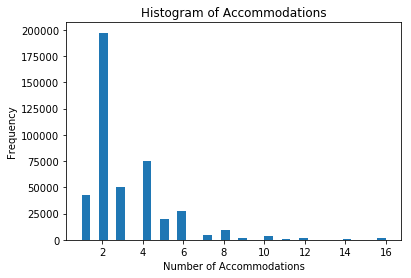

In [2]:
# visualize distribution of price (target variable)
plt.hist(data['accommodates'], bins=35)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

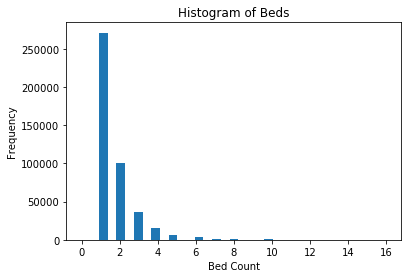

In [3]:
# visualize distribution of beds
plt.hist(data['beds'], bins=35)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

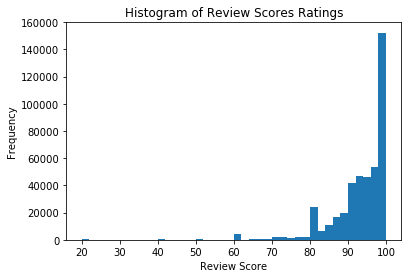

In [4]:
# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'],bins=40)
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

In [5]:
print 'Number of records:', len(data)

Number of records: 436201


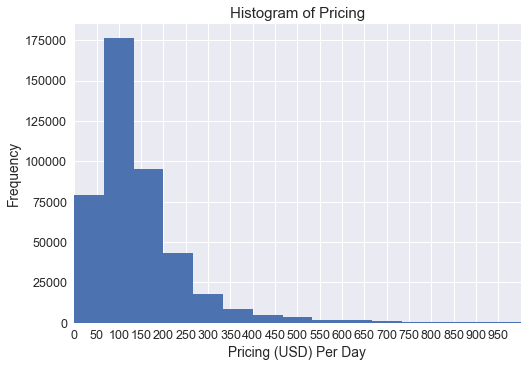

In [198]:
# visualize distribution of price (target variable)
plt.hist(data['price'], bins=150)
plt.xlim((0,1000))
plt.xticks(np.arange(0,1000, 50.0))
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

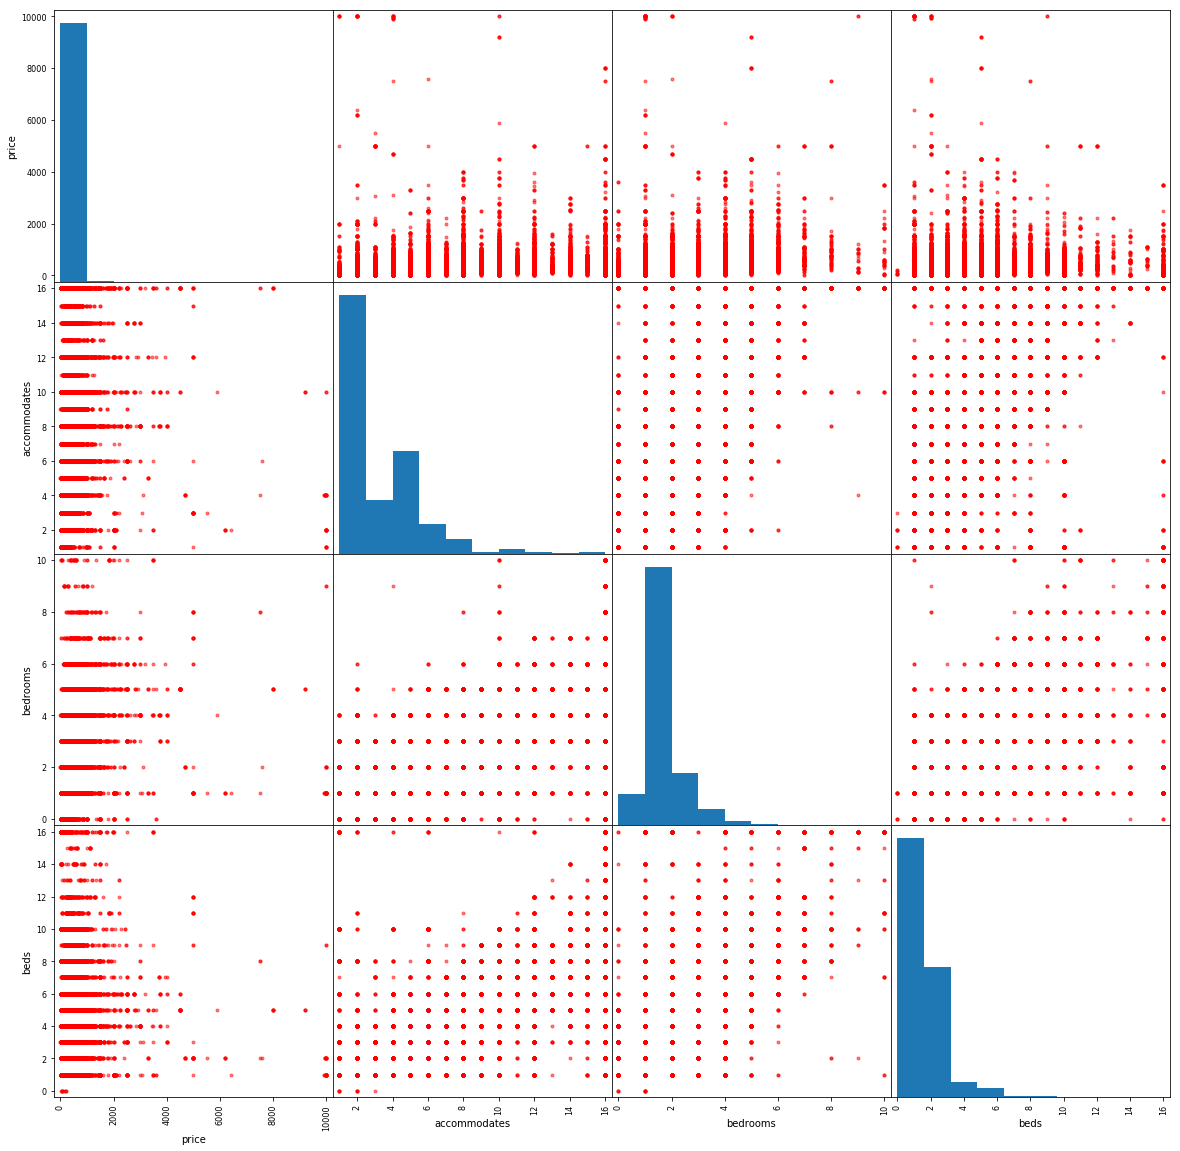

In [7]:
matrix_cols = ['price','accommodates','bedrooms', 'beds']
axs = pd.scatter_matrix(data[matrix_cols], figsize=(20, 20), c='red')

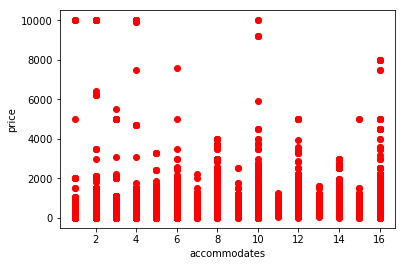

In [8]:
plt.plot(data['accommodates'],data['price'],'ro')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.show()


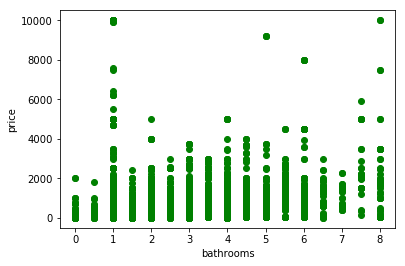

In [9]:
plt.plot(data['bathrooms'],data['price'],'go')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

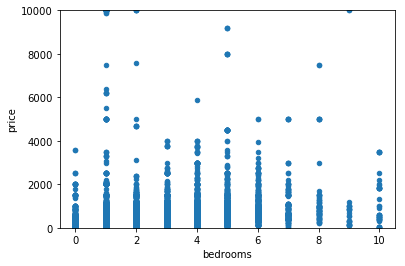

In [10]:

da = pd.concat([data['bedrooms'], data['price']], axis=1)
da.plot.scatter(x='bedrooms', y='price', ylim=(min(data['price']),max(data['price'])));


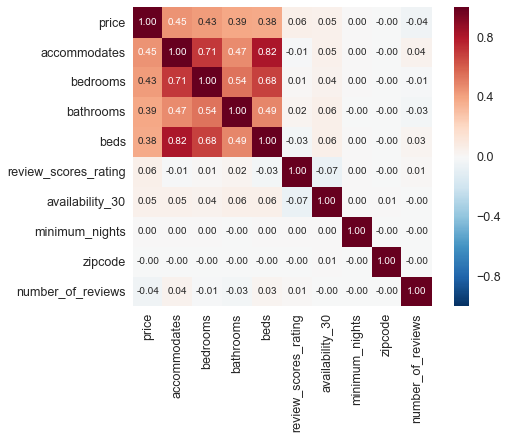

In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
import csv

k = 10 #number of variables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k,'price')['price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


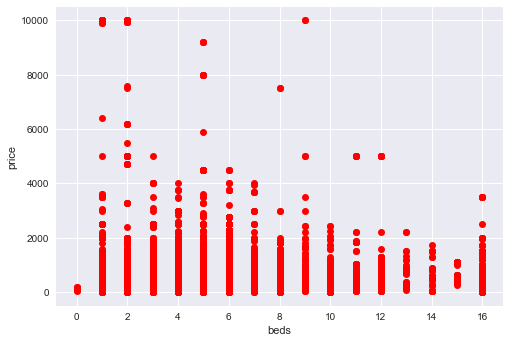

In [13]:
plt.plot(data['beds'],data['price'],'ro')
plt.xlabel('beds')
plt.ylabel('price')
plt.show()

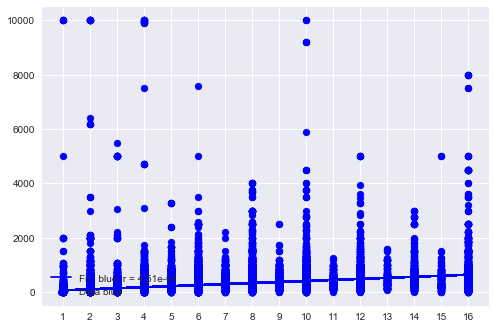

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plotData(x,y,color):
    


    xMap = assignIDs(x)
    xAsInts = np.array([xMap[i] for i in x])

    pearR = np.corrcoef(xAsInts,y)[1,0]
    # least squares from:
    # http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html
    A = np.vstack([xAsInts,np.ones(len(xAsInts))]).T
    m,c = np.linalg.lstsq(A,np.array(y))[0]

    plt.scatter(xAsInts,y,label='Data '+color,color=color)
    plt.plot(xAsInts,xAsInts*m+c,color=color,
             label="Fit %6s, r = %6.2e"%(color,pearR))
    plt.xticks(xMap.values(),xMap.keys())
    plt.legend(loc=3)
    
def assignIDs(list):
    '''Take a list of strings, and for each unique value assign a number.
    Returns a map for "unique-val"->id.
    '''
    sortedList = sorted(list)

    #taken from
    #http://stackoverflow.com/questions/480214/how-do-you-remove-duplicates-from-a-list-in-python-whilst-preserving-order/480227#480227
    seen = set()
    seen_add = seen.add
    uniqueList =  [ x for x in sortedList if x not in seen and not seen_add(x)]

    return  dict(zip(uniqueList,range(len(uniqueList))))

#DATA2 = []

plotData(data['accommodates'],data['price'],'blue')
#plotData(DATA2,'red')

In [24]:
data.keys()

Index([u'id', u'zipcode', u'property_type', u'room_type', u'accommodates',
       u'bathrooms', u'bedrooms', u'beds', u'bed_type', u'price',
       u'minimum_nights', u'availability_30', u'number_of_reviews',
       u'review_scores_rating'],
      dtype='object')

In [15]:
from sklearn.linear_model import LinearRegression
x=data.drop(data.columns[[0,1,2,3,8,9,12]],axis=1)

lm=LinearRegression()
lm.fit(x,data['price'])
LinearRegression(copy_X=True,fit_intercept=True,normalize=False)
print 'estimated intercept coefficient: ',lm.intercept_

estimated intercept coefficient:  -143.768104591


In [110]:
print 'number of coefficients:',len(lm.coef_)
pd.DataFrame(zip(x.columns,lm.coef_),columns=['features','estimated_coefficients'])

number of coefficients: 7


,features,estimated_coefficients
0,accommodates,27.910716
1,bathrooms,68.134598
2,bedrooms,33.169909
3,beds,-12.920673
4,minimum_nights,-0.000020
5,availability_30,0.437638
6,review_scores_rating,1.109345


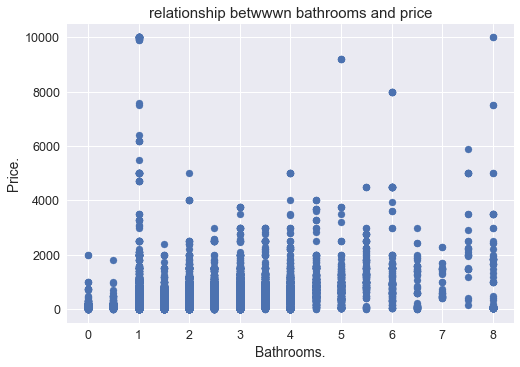

In [111]:
plt.scatter(data['bathrooms'],data['price'])
plt.xlabel("Bathrooms.")
plt.ylabel("Price.")
plt.title("relationship betwwwn bathrooms and price")
plt.show()

In [112]:
lm.predict(x)[0:5]

array([ 188.9587666 ,  185.63071193,  137.20619167,  215.35299838,
        121.43731208])

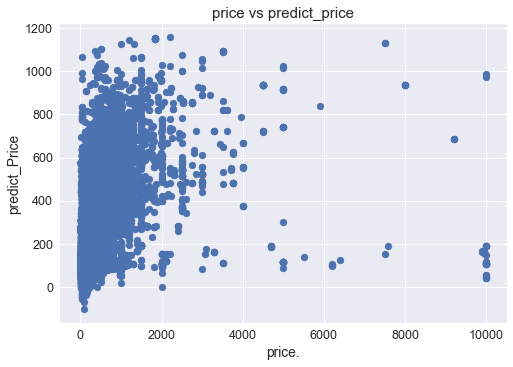

In [113]:
plt.scatter(data['price'],lm.predict(x))
plt.xlabel("price.")
plt.ylabel("predict_Price")
plt.title("price vs predict_price")
plt.show()

In [5]:
import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
x_train,x_test,y_train,y_test= train_test_split(x,data['price'],test_size=0.33,random_state=5)
print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

NameError: name 'x' is not defined

In [139]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred_train=lm.predict(x_train)
pred_test=lm.predict(x_test)

#np.abs(pred-actual) 
#(np.log(pred+1)-np.log(actual+1))**2

In [10]:
def abs_error(actual, pred): 
    return np.abs(pred-actual)


In [11]:
print 'Fit a model X_train, and calculate MSE with Y_train:', np.mean((y_train - lm.predict(x_train))**2)

#print 'Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((y_test - lm.predict(x_test)) ** 2)

Fit a model X_train, and calculate MSE with Y_train:

NameError: name 'y_train' is not defined

In [142]:
print 'MAE :', np.mean(abs_error(y_test,pred_test))
#print 'Fit a model X_train, and calculate MAE with Y_train:', np.mean(abs_error(y_train,pred_train))



MAE : 65.5358994712


In [143]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(x_train,y_train)
RFpred = RF.predict(x_test)

print 'RF MAE : ', np.mean(abs_error(RFpred,y_test))

RF MAE :  57.2254577244


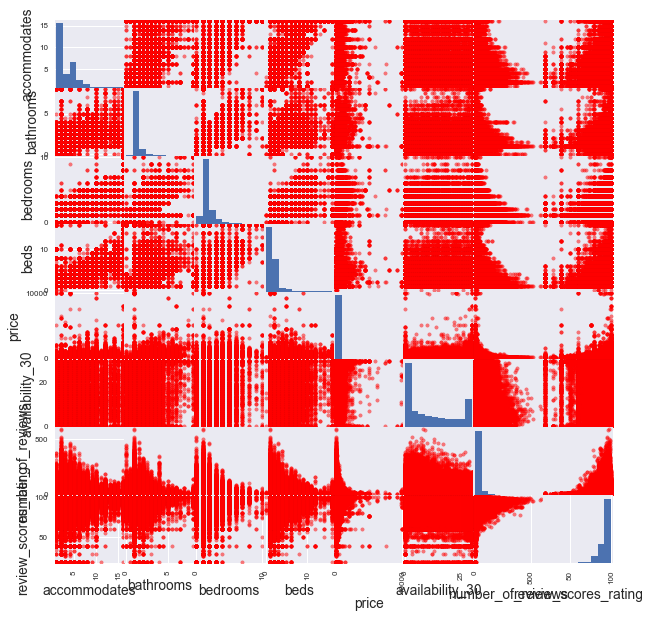

In [144]:
# check for collinearity and visualize relationship between each predictor and price
matrix_cols = ['accommodates','bathrooms', 'bedrooms', 'beds','price', 'availability_30', 'number_of_reviews','review_scores_rating']
axs = pd.scatter_matrix(data[matrix_cols], figsize=(10, 10), c='red')

In [145]:
from sklearn.ensemble import RandomForestRegressor

lm = RandomForestRegressor()
lm.fit(x_train,y_train)
RFpred = lm.predict(x_test)

print 'RF MAE : ', np.mean(abs_error(RFpred,y_test))

RF MAE :  56.8722203379


In [ ]:
from collections import Counter

print Counter(data['property_type'])


In [ ]:
print Counter(data['bed_type'])

In [7]:
df = pd.read_csv('output_clean_under200.csv')

print(df.shape)

(167880, 50)


In [8]:
#df_x_train,df_x_test,df_y_train,df_y_test= train_test_split(df[:,1:],df[:,0],test_size=0.2,random_state=5)
X ,Y = train_test_split(df,test_size = 0.2)
print X.shape
print Y.shape


df_x_train = X.iloc[:,2:]
df_x_test = Y.iloc[:,2:]
df_y_train = X.iloc[:,0]
df_y_test = Y.iloc[:,0]

print df_x_train.shape
print df_x_train.head()


(134304, 50)
(33576, 50)
(134304, 48)
        accommodates  bedrooms  beds  bathrooms  number_of_reviews  \
114208             2         1     1        1.0                 34   
84602              2         1     1        1.0                109   
48985              2         1     1        1.0                 18   
14427              2         1     1        1.0                 99   
88477              2         0     1        1.0                 56   

        minimum_nights  availability_30  review_scores_rating  Apartment  \
114208               2                9                    91          1   
84602                4               24                    91          1   
48985                1                6                    96          0   
14427                1               30                    95          1   
88477                5                3                    97          1   

        House  ...    Island  Plane  Entire home/apt  Private room  \
114208      0 

In [12]:
from sklearn.neural_network import MLPRegressor

'''MLP = MLPRegressor(solver = 'lbfgs' , hidden_layer_sizes = (30,100,100,100,50) , random_state = 1)
MLP.fit(df_x_train,df_y_train)
MLPpred = MLP.predict(df_x_test)


print 'MLP MAE : ', np.mean(abs_error(MLPpred,df_y_test))'''

from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(df_x_train,df_y_train)
RFpred = RF.predict(df_x_test)

print 'RF MAE : ', np.mean(abs_error(RFpred,df_y_test))


 RF MAE :  24.0421712864


In [16]:

lm=LinearRegression()
lm.fit(df_x_train,df_y_train)
pred_train=lm.predict(df_x_train)
pred_test=lm.predict(df_x_test)

def abs_error(actual, pred): 
    return np.abs(pred-actual)
print 'MAE :', np.mean(abs_error(df_y_test,pred_test))


MAE : 26.0448682596


In [13]:
import pickle

RFmodel = pickle.dumps(RF)

from sklearn.externals import joblib
joblib.dump(RF,'nozipcodeRFmodel.pkl')

['nozipcodeRFmodel.pkl']